In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# test split lib
from sklearn.model_selection import train_test_split

# Linear regressor
from sklearn.linear_model import LinearRegression

# Polynomial Regressor
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df = pd.read_csv('/Users/RyanMburu/Documents/Supervised-Learning/Regression/diamonds_prices/diamonds.csv')
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [3]:
df.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
price           int64
x             float64
y             float64
z             float64
dtype: object

In [15]:
df.shape

(53940, 11)

In [36]:
# sample
df_new = df.groupby(['color'], group_keys=False).apply(lambda grouped_subset:grouped_subset.sample(frac=0.0015))
df_new

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
44182,44183,0.56,Ideal,D,SI2,60.0,58.0,1568,5.42,5.38,3.24
52595,52596,0.75,Good,D,SI2,59.9,61.0,2541,5.90,5.96,3.55
3096,3097,0.73,Ideal,D,VS2,61.8,54.0,3319,5.89,5.92,3.65
6767,6768,0.91,Fair,D,VS2,65.7,56.0,4107,6.10,6.05,3.99
13504,13505,1.01,Ideal,D,SI1,61.2,57.0,5543,6.47,6.44,3.95
...,...,...,...,...,...,...,...,...,...,...,...
11402,11403,1.17,Ideal,I,SI2,61.8,54.0,4999,6.78,6.82,4.20
10014,10015,1.14,Ideal,J,SI1,61.7,54.0,4708,6.71,6.74,4.15
25213,25214,2.18,Very Good,J,SI1,62.9,59.0,13812,8.21,8.25,5.18
23413,23414,2.00,Very Good,J,SI1,61.9,59.0,11404,7.96,8.00,4.94


In [37]:
# Carats is our independent variable
# price is our dependent variable

X = df_new[['carat']].values
y = df_new[['price']].values

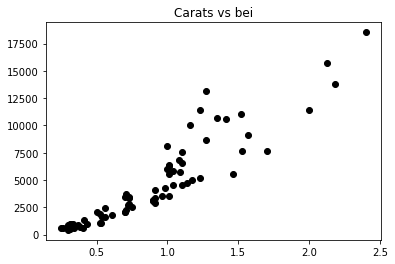

In [38]:
# Plot to see nature of plot

plt.scatter(X, y, color='black')
plt.title('Carats vs bei')
plt.show()

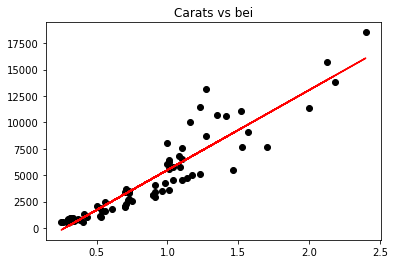

In [41]:
# Plot linear regression line

linear_reg = LinearRegression()
linear_reg.fit(X, y)

linear_prices = linear_reg.predict(X)

plt.scatter(X, y, color='black')
plt.plot(X, linear_prices, color='red')
plt.title('Carats vs bei')
plt.show()

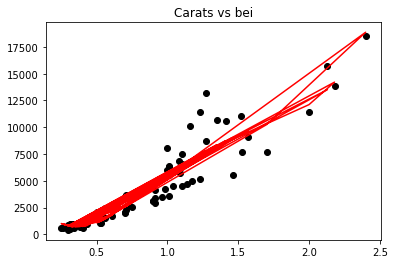

In [50]:
# Polynomial regression
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)

linear_poly = LinearRegression()
linear_poly.fit(X_poly, y)

poly_prices = linear_poly.predict(X_poly)

plt.scatter(X, y, color='black')
plt.plot(X, poly_prices, color='red')
plt.title('Carats vs bei')
plt.show()

In [52]:
# Lets predict now

# What would be the diamond's price if it is 1.31 carats?

# Linear regression ...
query_linear = linear_reg.predict([[3.31]])
print('Linear Regression')
print('The diamond would be worth : %d' %query_linear)

# Polynomial regressor
query_poly = linear_poly.predict(poly_reg.fit_transform([[1.31]]))
print ('\n*********************')

print('\nPolynomial Regression')
print('The diamond would be worth : %d' %query_linear)


Linear Regression
The diamond would be worth : 22970

*********************

Polynomial Regression
The diamond would be worth : 22970
